## Import Packages

In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col

In [4]:
from pyspark.sql.functions import desc

In [5]:
from pyspark.sql.functions import asc

In [6]:
import findspark

In [7]:
findspark.init()

In [8]:
spark = SparkSession.builder.appName('LongJump').getOrCreate()

In [9]:
MensLJ = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','MensOutdoorLongJump.csv').load()

In [10]:
WomensLJ = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','WomensOutdoorLongJump.csv').load()

In [11]:
IndoorMensLJ = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','IndoorLongJumpMens.csv').load()

In [12]:
IndoorWomensLJ = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','WomensIndoorLongJump.csv').load()

In [13]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

## Create Views

In [14]:
MensLJ.createOrReplaceTempView("MensLJ")

In [15]:
WomensLJ.createOrReplaceTempView("WomensLJ")

In [16]:
IndoorMensLJ.createOrReplaceTempView("IndoorMensLJ")

In [17]:
IndoorWomensLJ.createOrReplaceTempView("IndoorWomensLJ")

## Basic Select

In [18]:
resultone = spark.sql("SELECT * FROM MensLJ")
resultone.show()

+--------------------+-------+-----------------+
|               Names|Lengths|          Schools|
+--------------------+-------+-----------------+
|  (1) Erick WALDERSR|  8.74m|         Arkansas|
|(2) Kareem STREET...|  8.56m|             Rice|
|      — Walder {2}JR|  8.53m|         Arkansas|
|   (3) Melvin LISTER|  8.49m|         Arkansas|
|  (4) Kevin DILWORTH|  8.47m|Abilene Christian|
|      — Walder {3}SO|  8.47m|         Arkansas|
|      (4) Carl LEWIS|  8.47m|          Houston|
|      — Walder {4}SO|  8.46m|         Arkansas|
|(6) Juvaughn HARR...|  8.44m|              LSU|
| (7) Ngoni MAKUSHASR|  8.40m|    Florida State|
|   (7) Robert HOWARD|  8.40m|         Arkansas|
|  (9) Dion BENTLEYJR|  8.39m|          Florida|
|  (10) Roland MCGHEE|  8.38m| Middle Tennessee|
|(11) Wayne PINNOCKSO|  8.37m|         Arkansas|
|  (11) Zack BAZILESR|  8.37m|       Ohio State|
|(11) Leroy BURRELLJR|  8.37m|          Houston|
|     — Makusha {2}JR|  8.36m|    Florida State|
| (14) Carey MCLEODJ

In [19]:
resulttwo = spark.sql("SELECT * FROM WomensLJ")
resulttwo.show()

+--------------------+-------+----------+
|               Names|Lengths|   Schools|
+--------------------+-------+----------+
|    (1) Tara DAVISSO|  7.14m|     Texas|
| (2) Ackelia SMITHSO|  7.08m|     Texas|
|(3) Jackie JOYNER...|  6.99m|      UCLA|
|(4) Monae' NICHOLSSR|  6.97m|Texas Tech|
|       — Davis {2}SO|  6.97m|     Texas|
|       — Davis {3}SO|  6.97m|     Texas|
|       — Davis {4}SO|  6.97m|     Texas|
|     (4) Carol LEWIS|  6.97m|   Houston|
|  (6) Tyra GITTENSJR|  6.96m| Texas A&M|
| (7) Sheila ECHOLSSR|  6.94m|       LSU|
|(8) Brittney REESEJR|  6.93m|  Ole Miss|
|       — Davis {5}SO|  6.92m|     Texas|
|         — Lewis {2}|  6.92m|   Houston|
|         — Lewis {3}|  6.90m|   Houston|
|(9) Deborah ACQUAHSR|  6.89m| Texas A&M|
|       — Smith {2}SO|  6.88m|     Texas|
|(10) Jasmine MOOREJR|  6.88m|   Florida|
|(10) Blessing OKA...|  6.88m|      UTEP|
| (12) Alyssa JONESFR|  6.86m|  Stanford|
|     — Nichols {2}SR|  6.86m|Texas Tech|
+--------------------+-------+----

In [20]:
resultthree = spark.sql("SELECT * FROM IndoorMensLJ")
resultthree.show()

+--------------------+--------------------+-----------------+
|               Names|              Length|          Schools|
+--------------------+--------------------+-----------------+
|     (1) Miguel PATE|      8.59m📺  28-2¼|          Alabama|
|      (2) Carl LEWIS|       8.49m  27-10¼|          Houston|
|         — Lewis {2}|        8.48m  27-10|          Houston|
|(3) Juvaughn HARR...|        8.45m  27-8¾|              LSU|
|  (4) Erick WALDERSR|         8.43m  27-8|         Arkansas|
|  (5) Carey MCLEODSR|        8.40m  27-6¾|         Arkansas|
| (6) Cameron CRUMPSR|        8.39m  27-6½|Mississippi State|
|       — Crump {2}SR|        8.39m  27-6½|Mississippi State|
|  (6) Jarrion LAWSON|8.39m AA = Perfor...|         Arkansas|
|(8) Jeremiah DAVISJR|        8.37m  27-5½|    Florida State|
|  (9) Isaac GRIMESSR|        8.35m  27-4¾|    Florida State|
|          — Pate {2}|        8.35m  27-4¾|          Alabama|
|        — Pate {3}SR|        8.34m  27-4½|          Alabama|
|(10) Way

In [21]:
resultfour = spark.sql("SELECT * FROM IndoorWomensLJ")
resultfour.show()

+--------------------+-------+----------+
|               Names|Lengths|   Schools|
+--------------------+-------+----------+
| (1) Jasmine MOOREJR|  7.03m|   Florida|
|    (2) Tara DAVISJR|  6.93m|     Texas|
|       — Moore {2}JR|  6.91m|   Florida|
|(3) Whitney GIPSONSR|  6.91m|       TCU|
| (3) Elva GOULBOURNE|  6.91m|    Auburn|
|(5) Sha'Keela SAU...|  6.90m|  Kentucky|
| (6) Ackelia SMITHFR|  6.88m|     Texas|
|(6) Claire  BRYANTJR|  6.88m|   Florida|
|       — Smith {2}FR|  6.87m|     Texas|
|       — Moore {3}JR|  6.87m|   Florida|
|(8) Blessing OKAG...|  6.87m|      UTEP|
|  (8) Brittney REESE|  6.87m|  Ole Miss|
|       — Moore {4}JR|  6.86m|   Florida|
|    — Okagbare {2}SR|  6.84m|      UTEP|
|   (10) Ruth USOROSR|  6.82m|Texas Tech|
|    — Saunders {2}SR|  6.82m|  Kentucky|
|(10) Daphne SAUNDERS|  6.82m|       LSU|
|         — Reese {2}|  6.81m|  Ole Miss|
|  — Goulbourne {2}SR|  6.81m|    Auburn|
|(12) Quanesha BUR...|  6.80m|   Alabama|
+--------------------+-------+----

## Query One  - Lengths (Womens)

In [22]:
QueryOneA = spark.sql("SELECT Lengths, COUNT(*) as count FROM IndoorWomensLJ GROUP BY Lengths ORDER BY count DESC")
QueryOneA.show()

+-------+-----+
|Lengths|count|
+-------+-----+
|  6.70m|    6|
|  6.73m|    6|
|  6.75m|    5|
|  6.71m|    5|
|  6.76m|    4|
|  6.87m|    4|
|  6.82m|    3|
|  6.74m|    3|
|  6.91m|    3|
|  6.72m|    3|
|  6.78m|    2|
|  6.88m|    2|
|  6.81m|    2|
|  6.80m|    2|
|  6.79m|    1|
|  6.93m|    1|
|  6.90m|    1|
|  6.84m|    1|
|  7.03m|    1|
|  6.86m|    1|
+-------+-----+



In [23]:
QueryOneB = spark.sql("SELECT Lengths, COUNT(*) as count FROM WomensLJ GROUP BY Lengths ORDER BY count DESC")
QueryOneB.show()

+-------+-----+
|Lengths|count|
+-------+-----+
|  6.82m|    7|
|  6.78m|    6|
|  6.81m|    5|
|  6.97m|    5|
|  6.80m|    4|
|  6.86m|    4|
|  6.88m|    3|
|  6.84m|    3|
|  6.79m|    2|
|  6.92m|    2|
|  7.14m|    1|
|  6.96m|    1|
|  6.85m|    1|
|  6.93m|    1|
|  6.90m|    1|
|  6.89m|    1|
|  6.83m|    1|
|  6.99m|    1|
|  7.08m|    1|
|  6.94m|    1|
+-------+-----+



## Query Two - Lengths (Mens)

In [25]:
QueryTwoA = spark.sql("SELECT Length, COUNT(*) as count FROM IndoorMensLJ GROUP BY Length ORDER BY count DESC")
QueryTwoA.show()

+--------------------+-----+
|              Length|count|
+--------------------+-----+
|         8.33m  27-4|    6|
|         8.25m  27-¾|    4|
|       8.21m  26-11¼|    3|
|       8.19m  26-10½|    3|
|         8.28m  27-2|    3|
|        8.18m  26-10|    2|
|8.18m ++ = Enrout...|    2|
|8.24m ++ = Enrout...|    2|
|        8.26m  27-1¼|    2|
|        8.27m  27-1¾|    2|
|        8.35m  27-4¾|    2|
|         8.23m  27-0|    2|
|       8.22m  26-11¾|    2|
|8.27m ++ = Enrout...|    2|
|        8.39m  27-6½|    2|
|8.23m ++ = Enrout...|    1|
|8.28m AA = Perfor...|    1|
|        8.34m  27-4½|    1|
|         8.24m  27-½|    1|
|8.22m ++ = Enrout...|    1|
+--------------------+-----+
only showing top 20 rows



In [26]:
QueryTwoB = spark.sql("SELECT Lengths, COUNT(*) as count FROM MensLJ GROUP BY Lengths ORDER BY count DESC")
QueryTwoB.show()

+-------+-----+
|Lengths|count|
+-------+-----+
|  8.34m|    5|
|  8.24m|    4|
|  8.28m|    3|
|  8.47m|    3|
|  8.37m|    3|
|  8.26m|    3|
|  8.27m|    3|
|  8.40m|    2|
|  8.25m|    1|
|  8.49m|    1|
|  8.39m|    1|
|  8.46m|    1|
|  8.29m|    1|
|  8.36m|    1|
|  8.31m|    1|
|  8.74m|    1|
|  8.44m|    1|
|  8.53m|    1|
|  8.56m|    1|
|  8.30m|    1|
+-------+-----+
only showing top 20 rows



## Query Three - Schools (Womens)

In [27]:
QueryThreeA = spark.sql("SELECT Schools, COUNT(*) as count FROM IndoorWomensLJ GROUP BY Schools ORDER BY count DESC")
QueryThreeA.show()

+------------+-----+
|     Schools|count|
+------------+-----+
|     Florida|   10|
|       Texas|    6|
|     Alabama|    5|
|         LSU|    4|
|    Ole Miss|    4|
|    Kentucky|    4|
|   Tennessee|    4|
|      Auburn|    3|
|     Georgia|    3|
|Kansas State|    2|
|         TCU|    2|
|        UTEP|    2|
|  Texas Tech|    2|
|     Houston|    2|
|      Oregon|    1|
|     Cornell|    1|
|    Stanford|    1|
+------------+-----+



In [28]:
QueryThreeB = spark.sql("SELECT Schools, COUNT(*) as count FROM WomensLJ GROUP BY Schools ORDER BY count DESC")
QueryThreeB.show()

+--------------+-----+
|       Schools|count|
+--------------+-----+
|         Texas|    8|
|    Texas Tech|    6|
|       Florida|    5|
|       Georgia|    3|
|     Texas A&M|    3|
|       Houston|    3|
|        Auburn|    2|
|           LSU|    2|
|          UTEP|    2|
|          UCLA|    2|
|      Ole Miss|    2|
|       Alabama|    2|
| Southern Miss|    1|
|        Oregon|    1|
|      Arkansas|    1|
|Texas Southern|    1|
|           TCU|    1|
|      Nebraska|    1|
|  George Mason|    1|
|      Stanford|    1|
+--------------+-----+
only showing top 20 rows



## Query Four - Schools (Mens)

In [29]:
QueryFourA = spark.sql("SELECT Schools, COUNT(*) as count FROM IndoorMensLJ GROUP BY Schools ORDER BY count DESC")
QueryFourA.show()

+-----------------+-----+
|          Schools|count|
+-----------------+-----+
|         Arkansas|   14|
|    Florida State|   10|
|          Florida|    7|
|              LSU|    5|
|          Alabama|    5|
|Mississippi State|    4|
|          Houston|    4|
|        Tennessee|    3|
|             UTEP|    2|
| Middle Tennessee|    2|
|          Rutgers|    2|
|    Jackson State|    1|
|         Southern|    1|
|         Illinois|    1|
|          Georgia|    1|
|         Ole Miss|    1|
|        Texas A&M|    1|
+-----------------+-----+



In [30]:
QueryFourB = spark.sql("SELECT Schools, COUNT(*) as count FROM MensLJ GROUP BY Schools ORDER BY count DESC")
QueryFourB.show()

+-----------------+-----+
|          Schools|count|
+-----------------+-----+
|         Arkansas|   12|
|          Florida|    4|
|              LSU|    3|
|             Rice|    3|
|    Florida State|    3|
|            Texas|    2|
|   Texas Southern|    2|
| Middle Tennessee|    2|
|          Houston|    2|
|       Ohio State|    1|
|             UCLA|    1|
|         Ole Miss|    1|
|Abilene Christian|    1|
|          Alabama|    1|
|        Tennessee|    1|
+-----------------+-----+



## Query Five - Percentage of Lengths (Womens)

In [35]:
QueryFiveA = spark.sql("SELECT Lengths, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM WomensLJ)) * 100 as percentage FROM WomensLJ GROUP BY Lengths")
QueryFiveA.show()

+-------+-----+------------------+
|Lengths|count|        percentage|
+-------+-----+------------------+
|  7.14m|    1|1.9607843137254901|
|  6.78m|    6| 11.76470588235294|
|  6.88m|    3|  5.88235294117647|
|  6.79m|    2|3.9215686274509802|
|  6.81m|    5| 9.803921568627452|
|  6.96m|    1|1.9607843137254901|
|  6.82m|    7|13.725490196078432|
|  6.92m|    2|3.9215686274509802|
|  6.85m|    1|1.9607843137254901|
|  6.93m|    1|1.9607843137254901|
|  6.90m|    1|1.9607843137254901|
|  6.84m|    3|  5.88235294117647|
|  6.89m|    1|1.9607843137254901|
|  6.80m|    4|7.8431372549019605|
|  6.97m|    5| 9.803921568627452|
|  6.83m|    1|1.9607843137254901|
|  6.99m|    1|1.9607843137254901|
|  7.08m|    1|1.9607843137254901|
|  6.86m|    4|7.8431372549019605|
|  6.94m|    1|1.9607843137254901|
+-------+-----+------------------+



In [36]:
QueryFiveB = spark.sql("SELECT Lengths, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorWomensLJ)) * 100 as percentage FROM IndoorWomensLJ GROUP BY Lengths")
QueryFiveB.show()

+-------+-----+------------------+
|Lengths|count|        percentage|
+-------+-----+------------------+
|  6.78m|    2| 3.571428571428571|
|  6.88m|    2| 3.571428571428571|
|  6.79m|    1|1.7857142857142856|
|  6.81m|    2| 3.571428571428571|
|  6.70m|    6|10.714285714285714|
|  6.82m|    3| 5.357142857142857|
|  6.74m|    3| 5.357142857142857|
|  6.75m|    5| 8.928571428571429|
|  6.73m|    6|10.714285714285714|
|  6.93m|    1|1.7857142857142856|
|  6.90m|    1|1.7857142857142856|
|  6.91m|    3| 5.357142857142857|
|  6.84m|    1|1.7857142857142856|
|  6.76m|    4| 7.142857142857142|
|  6.80m|    2| 3.571428571428571|
|  7.03m|    1|1.7857142857142856|
|  6.86m|    1|1.7857142857142856|
|  6.87m|    4| 7.142857142857142|
|  6.72m|    3| 5.357142857142857|
|  6.71m|    5| 8.928571428571429|
+-------+-----+------------------+



## Query Six -  Percentage of Lengths (Mens)

In [37]:
QuerySixA = spark.sql("SELECT Lengths, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM MensLJ)) * 100 as percentage FROM WomensLJ GROUP BY Lengths")
QuerySixA.show()

+-------+-----+------------------+
|Lengths|count|        percentage|
+-------+-----+------------------+
|  7.14m|    1| 2.564102564102564|
|  6.78m|    6|15.384615384615385|
|  6.88m|    3|7.6923076923076925|
|  6.79m|    2| 5.128205128205128|
|  6.81m|    5| 12.82051282051282|
|  6.96m|    1| 2.564102564102564|
|  6.82m|    7| 17.94871794871795|
|  6.92m|    2| 5.128205128205128|
|  6.85m|    1| 2.564102564102564|
|  6.93m|    1| 2.564102564102564|
|  6.90m|    1| 2.564102564102564|
|  6.84m|    3|7.6923076923076925|
|  6.89m|    1| 2.564102564102564|
|  6.80m|    4|10.256410256410255|
|  6.97m|    5| 12.82051282051282|
|  6.83m|    1| 2.564102564102564|
|  6.99m|    1| 2.564102564102564|
|  7.08m|    1| 2.564102564102564|
|  6.86m|    4|10.256410256410255|
|  6.94m|    1| 2.564102564102564|
+-------+-----+------------------+



In [39]:
QuerySixB = spark.sql("SELECT Lengths, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorMensLJ)) * 100 as percentage FROM WomensLJ GROUP BY Lengths")
QuerySixB.show()

+-------+-----+----------+
|Lengths|count|percentage|
+-------+-----+----------+
|  7.14m|    1|    1.5625|
|  6.78m|    6|     9.375|
|  6.88m|    3|    4.6875|
|  6.79m|    2|     3.125|
|  6.81m|    5|    7.8125|
|  6.96m|    1|    1.5625|
|  6.82m|    7|   10.9375|
|  6.92m|    2|     3.125|
|  6.85m|    1|    1.5625|
|  6.93m|    1|    1.5625|
|  6.90m|    1|    1.5625|
|  6.84m|    3|    4.6875|
|  6.89m|    1|    1.5625|
|  6.80m|    4|      6.25|
|  6.97m|    5|    7.8125|
|  6.83m|    1|    1.5625|
|  6.99m|    1|    1.5625|
|  7.08m|    1|    1.5625|
|  6.86m|    4|      6.25|
|  6.94m|    1|    1.5625|
+-------+-----+----------+



## Query Seven -  Percentage of Schools (Womens)

In [40]:
QuerySevenA = spark.sql("SELECT Lengths, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorWomensLJ)) * 100 as percentage FROM WomensLJ GROUP BY Lengths")
QuerySevenA.show()

+-------+-----+------------------+
|Lengths|count|        percentage|
+-------+-----+------------------+
|  7.14m|    1|1.7857142857142856|
|  6.78m|    6|10.714285714285714|
|  6.88m|    3| 5.357142857142857|
|  6.79m|    2| 3.571428571428571|
|  6.81m|    5| 8.928571428571429|
|  6.96m|    1|1.7857142857142856|
|  6.82m|    7|              12.5|
|  6.92m|    2| 3.571428571428571|
|  6.85m|    1|1.7857142857142856|
|  6.93m|    1|1.7857142857142856|
|  6.90m|    1|1.7857142857142856|
|  6.84m|    3| 5.357142857142857|
|  6.89m|    1|1.7857142857142856|
|  6.80m|    4| 7.142857142857142|
|  6.97m|    5| 8.928571428571429|
|  6.83m|    1|1.7857142857142856|
|  6.99m|    1|1.7857142857142856|
|  7.08m|    1|1.7857142857142856|
|  6.86m|    4| 7.142857142857142|
|  6.94m|    1|1.7857142857142856|
+-------+-----+------------------+



In [41]:
QuerySevenB = spark.sql("SELECT Lengths, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM WomensLJ)) * 100 as percentage FROM WomensLJ GROUP BY Lengths")
QuerySevenB.show()

+-------+-----+------------------+
|Lengths|count|        percentage|
+-------+-----+------------------+
|  7.14m|    1|1.9607843137254901|
|  6.78m|    6| 11.76470588235294|
|  6.88m|    3|  5.88235294117647|
|  6.79m|    2|3.9215686274509802|
|  6.81m|    5| 9.803921568627452|
|  6.96m|    1|1.9607843137254901|
|  6.82m|    7|13.725490196078432|
|  6.92m|    2|3.9215686274509802|
|  6.85m|    1|1.9607843137254901|
|  6.93m|    1|1.9607843137254901|
|  6.90m|    1|1.9607843137254901|
|  6.84m|    3|  5.88235294117647|
|  6.89m|    1|1.9607843137254901|
|  6.80m|    4|7.8431372549019605|
|  6.97m|    5| 9.803921568627452|
|  6.83m|    1|1.9607843137254901|
|  6.99m|    1|1.9607843137254901|
|  7.08m|    1|1.9607843137254901|
|  6.86m|    4|7.8431372549019605|
|  6.94m|    1|1.9607843137254901|
+-------+-----+------------------+



## Query Eight -  Percentage of Schools (Mens)

In [42]:
QueryEightA = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM MensLJ)) * 100 as percentage FROM MensLJ GROUP BY Schools")
QueryEightA.show()

+-----------------+-----+------------------+
|          Schools|count|        percentage|
+-----------------+-----+------------------+
|         Arkansas|   12| 30.76923076923077|
|            Texas|    2| 5.128205128205128|
|   Texas Southern|    2| 5.128205128205128|
|              LSU|    3|7.6923076923076925|
|       Ohio State|    1| 2.564102564102564|
| Middle Tennessee|    2| 5.128205128205128|
|             UCLA|    1| 2.564102564102564|
|         Ole Miss|    1| 2.564102564102564|
|Abilene Christian|    1| 2.564102564102564|
|             Rice|    3|7.6923076923076925|
|          Alabama|    1| 2.564102564102564|
|    Florida State|    3|7.6923076923076925|
|          Houston|    2| 5.128205128205128|
|        Tennessee|    1| 2.564102564102564|
|          Florida|    4|10.256410256410255|
+-----------------+-----+------------------+



In [43]:
QueryEightB = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM IndoorMensLJ)) * 100 as percentage FROM WomensLJ GROUP BY Schools")
QueryEightB.show()

+--------------+-----+----------+
|       Schools|count|percentage|
+--------------+-----+----------+
|        Auburn|    2|     3.125|
| Southern Miss|    1|    1.5625|
|        Oregon|    1|    1.5625|
|      Arkansas|    1|    1.5625|
|         Texas|    8|      12.5|
|Texas Southern|    1|    1.5625|
|           TCU|    1|    1.5625|
|           LSU|    2|     3.125|
|      Nebraska|    1|    1.5625|
|          UTEP|    2|     3.125|
|    Texas Tech|    6|     9.375|
|  George Mason|    1|    1.5625|
|      Stanford|    1|    1.5625|
|          UCLA|    2|     3.125|
|       Georgia|    3|    4.6875|
|      Ole Miss|    2|     3.125|
|     Texas A&M|    3|    4.6875|
|       Alabama|    2|     3.125|
|          Iowa|    1|    1.5625|
|       Houston|    3|    4.6875|
+--------------+-----+----------+
only showing top 20 rows



## Histograms

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MoJo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [45]:
MensLJDF = pd.read_csv('MensOutdoorLongJump.csv')
MensLJDF

,Names,Lengths,Schools
0,(1) Erick WALDERSR,8.74m,Arkansas
1,(2) Kareem STREETE-THOMPSON,8.56m,Rice
2,— Walder {2}JR,8.53m,Arkansas
3,(3) Melvin LISTER,8.49m,Arkansas
4,(4) Kevin DILWORTH,8.47m,Abilene Christian
5,— Walder {3}SO,8.47m,Arkansas
6,(4) Carl LEWIS,8.47m,Houston
7,— Walder {4}SO,8.46m,Arkansas
8,(6) Juvaughn HARRISONJR,8.44m,LSU
9,(7) Ngoni MAKUSHASR,8.40m,Florida State


In [46]:
WomensLJDF = pd.read_csv('WomensOutdoorLongJump.csv')
WomensLJDF

,Names,Lengths,Schools
0,(1) Tara DAVISSO,7.14m,Texas
1,(2) Ackelia SMITHSO,7.08m,Texas
2,(3) Jackie JOYNER-KERSEE,6.99m,UCLA
3,(4) Monae' NICHOLSSR,6.97m,Texas Tech
4,— Davis {2}SO,6.97m,Texas
5,— Davis {3}SO,6.97m,Texas
6,— Davis {4}SO,6.97m,Texas
7,(4) Carol LEWIS,6.97m,Houston
8,(6) Tyra GITTENSJR,6.96m,Texas A&M
9,(7) Sheila ECHOLSSR,6.94m,LSU


In [47]:
IndoorMensLJDF = pd.read_csv('IndoorLongJumpMens.csv')
IndoorMensLJDF

,Names,Length,Schools
0,(1) Miguel PATE,8.59m📺 28-2¼,Alabama
1,(2) Carl LEWIS,8.49m 27-10¼,Houston
2,— Lewis {2},8.48m 27-10,Houston
3,(3) Juvaughn HARRISONSR,8.45m 27-8¾,LSU
4,(4) Erick WALDERSR,8.43m 27-8,Arkansas
...,...,...,...
59,(24) Will WILLIAMSSR,8.19m 26-10½,Texas A&M
60,— Harrison {3}SR,8.18m ++ = Enroute to a longer distance or a s...,LSU
61,— Grimes {6}SR,8.18m 26-10,Florida State
62,— Crawford {2},8.18m ++ = Enroute to a longer distance or a s...,Rutgers


In [48]:
IndoorWomensLJDF = pd.read_csv('WomensIndoorLongJump.csv')
IndoorWomensLJDF

,Names,Lengths,Schools
0,(1) Jasmine MOOREJR,7.03m,Florida
1,(2) Tara DAVISJR,6.93m,Texas
2,— Moore {2}JR,6.91m,Florida
3,(3) Whitney GIPSONSR,6.91m,TCU
4,(3) Elva GOULBOURNE,6.91m,Auburn
5,(5) Sha'Keela SAUNDERSSR,6.90m,Kentucky
6,(6) Ackelia SMITHFR,6.88m,Texas
7,(6) Claire BRYANTJR,6.88m,Florida
8,— Smith {2}FR,6.87m,Texas
9,— Moore {3}JR,6.87m,Florida


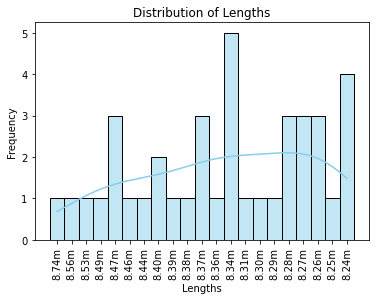

In [49]:
# Create a histogram using Seaborn
column_name = "Lengths"
sns.histplot(MensLJDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

#Make names more readable
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens LJ')

# Show the plot
plt.show()

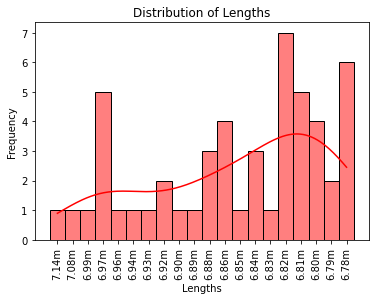

In [50]:
# Create a histogram using Seaborn
column_name = "Lengths"
sns.histplot(WomensLJDF[column_name], bins=20, kde=True, color='red', edgecolor='black')


#Make names more readable
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens LJ')

# Show the plot
plt.show()

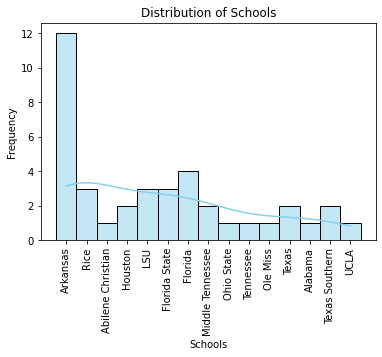

In [51]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(MensLJDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Mens LJ')

#Make names more readable
plt.xticks(rotation=90)


# Show the plot
plt.show()

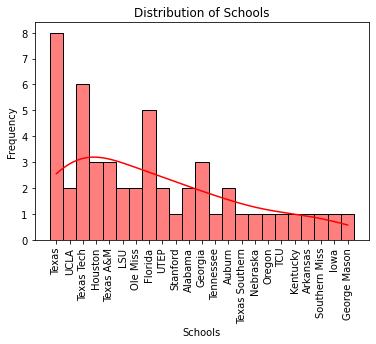

In [52]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(WomensLJDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens LJ')

#Make names more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Indoor Long Jump

C:\Users\MoJo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


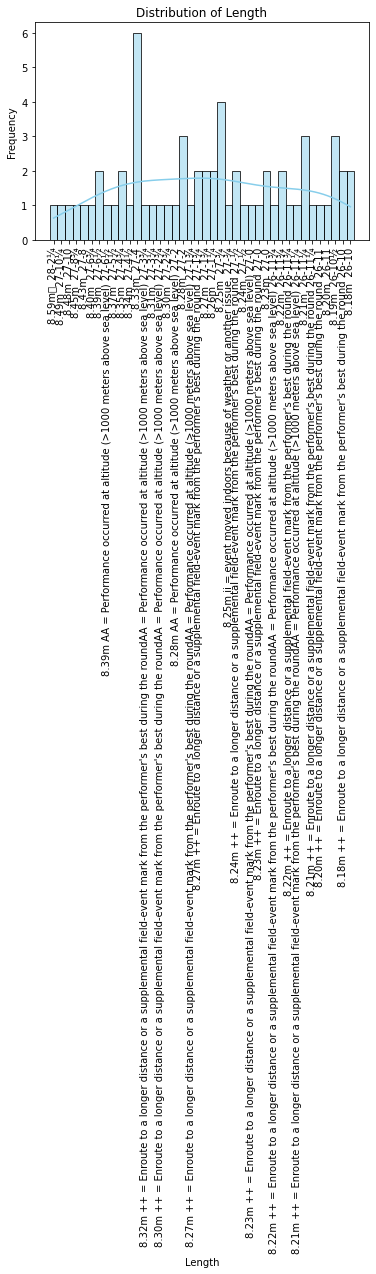

In [53]:
# Create a histogram using Seaborn
column_name = "Length"
sns.histplot(IndoorMensLJDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

#Make names more readable
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Indoor Mens')

# Show the plot
plt.show()

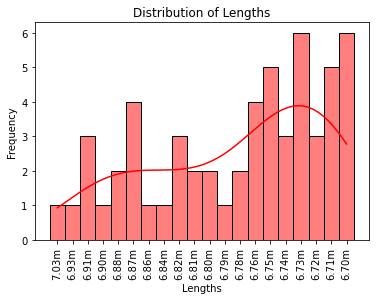

In [54]:
# Create a histogram using Seaborn
column_name = "Lengths"
sns.histplot(IndoorWomensLJDF[column_name], bins=20, kde=True, color='red', edgecolor='black')


#Make names more readable
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Indoor Womens')

# Show the plot
plt.show()

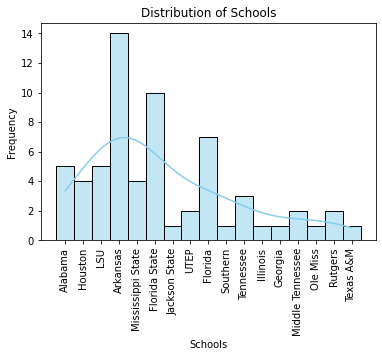

In [55]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(IndoorMensLJDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Indoor Mens LJ')

#Make names more readable
plt.xticks(rotation=90)


# Show the plot
plt.show()

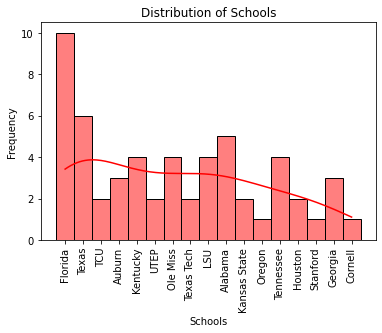

In [56]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(IndoorWomensLJDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name} for Womens LJ')

#Make names more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()